In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread
# Technically not necessary in newest versions of jupyter
%matplotlib inline

In [2]:
pwd

'D:\\data science\\Myprojects\\CHEST_X_RAY\\chest_xray\\chest_xray'

In [3]:
my_data_dir = 'D:\\data science\\Myprojects\\CHEST_X_RAY\\chest_xray\\chest_xray'



In [4]:
os.listdir(my_data_dir)

['.DS_Store',
 '.ipynb_checkpoints',
 '72%.h5',
 '74%.h5',
 'app.py',
 'best_model.h5',
 'Chest_Image .ipynb',
 'good_model.h5',
 'static',
 'templates',
 'test',
 'train',
 'Untitled.ipynb',
 'uploads',
 'val']

In [5]:
train_path = my_data_dir + '\\train'
test_path =  my_data_dir + "\\test"

In [6]:
os.listdir(test_path)

['.DS_Store', 'NORMAL', 'PNEUMONIA']

In [7]:
os.listdir(test_path+"\\PNEUMONIA")[0]

'person100_bacteria_475.jpeg'

In [8]:
example = test_path + "\\PNEUMONIA" + "\\person100_bacteria_475.jpeg"

In [9]:
example_img = imread(example)

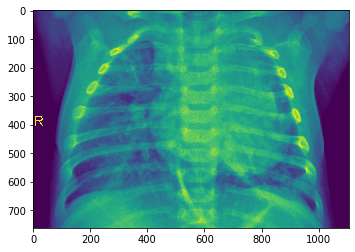

In [10]:
plt.imshow(example_img)

In [11]:
example_img.shape

(762, 1106)

In [12]:
# Other options: https://stackoverflow.com/questions/1507084/how-to-check-dimensions-of-all-images-in-a-directory-using-python
dim1 = []
dim2 = []
c = []
for image_filename in os.listdir(test_path+'\\PNEUMONIA\\'):
    
    img = imread(test_path+'\\PNEUMONIA'+'\\'+image_filename)
    d1,d2 = img.shape
    dim1.append(d1)
    dim2.append(d2)
    

In [13]:
np.mean(dim1)

765.2897435897436

In [14]:
np.mean(dim2)

1140.823076923077

In [15]:
image_shape = (128,128,3)

In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [17]:
image_gen = ImageDataGenerator(rotation_range=20, # rotate the image 20 degrees
                               width_shift_range=0.10, # Shift the pic width by a max of 5%
                               height_shift_range=0.10, # Shift the pic height by a max of 5%
                               rescale=1/255, # Rescale the image by normalzing it.
                               shear_range=0.1, # Shear means cutting away part of the image (max 10%)
                               zoom_range=0.1, # Zoom in by 10% max
                               horizontal_flip=True, # Allo horizontal flipping
                               fill_mode='nearest' # Fill in missing pixels with the nearest filled value
                              )

In [18]:
image_gen.flow_from_directory(train_path)

Found 5216 images belonging to 2 classes.


In [19]:
image_gen.flow_from_directory(test_path)

Found 624 images belonging to 2 classes.


In [20]:
batch_size = 16

In [21]:
test_image_gen = image_gen.flow_from_directory(test_path,
                                               target_size=image_shape[:2],
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary',shuffle=False)

Found 624 images belonging to 2 classes.


In [22]:
train_image_gen = image_gen.flow_from_directory(train_path,
                                               target_size=image_shape[:2],
                                                color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary')

Found 5216 images belonging to 2 classes.


In [23]:
train_image_gen.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dense,Dropout,Flatten

In [25]:
# model = Sequential()

# model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=image_shape,activation='relu'))
# model.add(MaxPool2D(4,4))

# model.add(Conv2D(filters=64,kernel_size=(4,4),activation='relu'))
# model.add(MaxPool2D(4,4))


# model.add(Conv2D(filters=64,kernel_size=(4,4),activation='relu'))
# model.add(MaxPool2D(4,4))


# model.add(Flatten())

# model.add(Dense(256,activation='relu'))

# model.add(Dropout(0.4))

# model.add(Dense(1,activation='sigmoid'))

# model.compile(loss='binary_crossentropy',metrics=['accuracy'],optimizer='adam')


In [26]:
# model.summary()

In [27]:
from tensorflow.keras.callbacks import EarlyStopping

In [28]:
early_stop = EarlyStopping(monitor='val_loss',patience=5)

In [29]:
# results = model.fit_generator(train_image_gen,epochs=200,
#                               validation_data=test_image_gen,
#                              callbacks=[early_stop])

In [30]:
# model.evaluate(test_image_gen)

In [31]:
# from tensorflow.keras.models import load_model
# model.save('72%.h5')

In [32]:
# model = Sequential()

# model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=image_shape,activation='relu'))
# model.add(MaxPool2D(4,4))
# model.add(Dropout(0.2))


# model.add(Conv2D(filters=64,kernel_size=(4,4),activation='relu'))
# model.add(MaxPool2D(4,4))



# model.add(Flatten())

# model.add(Dense(256,activation='relu'))

# model.add(Dropout(0.4))

# model.add(Dense(1,activation='sigmoid'))

# model.compile(loss='binary_crossentropy',metrics=['accuracy'],optimizer='adam')


In [33]:
# results = model.fit_generator(train_image_gen,epochs=200,
#                               validation_data=test_image_gen,
#                              callbacks=[early_stop])

In [34]:
# model.evaluate(test_image_gen)

In [35]:
# losses= pd.DataFrame(model.history.history)

In [36]:
# losses.plot()

In [37]:
# losses[['val_loss','loss']].plot()

In [38]:
# losses[['val_accuracy','accuracy']].plot()

In [39]:
# model.save("74%.h5")

In [40]:
from tensorflow.keras.layers import BatchNormalization

In [41]:
#good model 84% at 2 epoch
model = Sequential()

model.add(Conv2D(f `!`````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````ilters=32,kernel_size=(4,4),input_shape=image_shape,activation='relu'))
model.add(MaxPool2D(4,4))


model.add(BatchNormalization())
model.add(Conv2D(filters=64,kernel_size=(4,4),activation='relu'))
model.add(MaxPool2D(4,4))



model.add(Flatten())

model.add(Dense(128,activation='relu'))

model.add(Dropout(0.35))
model.add(BatchNormalization())

model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',metrics=['accuracy'],optimizer='adam')


In [42]:
results = model.fit_generator(train_image_gen,epochs=200,
                              validation_data=test_image_gen,
                             callbacks=[early_stop])

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 326 steps, validate for 39 steps
Epoch 1/200
326/326 [==============================] - 333s 1s/step - loss: 0.3172 - accuracy: 0.8623 - val_loss: 1.4306 - val_accuracy: 0.6250
Epoch 2/200
326/326 [==============================] - 256s 784ms/step - loss: 0.2430 - accuracy: 0.9026 - val_loss: 0.3816 - val_accuracy: 0.8237
Epoch 3/200
326/326 [==============================] - 227s 695ms/step - loss: 0.2730 - accuracy: 0.8792 - val_loss: 1.4978 - val_accuracy: 0.6250
Epoch 4/200
326/326 [==============================] - 227s 697ms/step - loss: 0.2291 - accuracy: 0.9089 - val_loss: 1.3091 - val_accuracy: 0.6378
Epoch 5/200
326/326 [==============================] - 118s 361ms/step - loss: 0.2132 - accuracy: 0.9114 - val_loss: 0.7396 - val_accuracy: 0.6875
Epoch 6/200
326/326 [==============================] - 81s 247ms/step - loss: 0.2135 - accuracy: 0.

In [43]:
losses[['val_accuracy','accuracy']].plot()

NameError: name 'losses' is not defined

In [ ]:
losses[['val_loss','loss']].plot()

In [ ]:
model.evaluate(test_image_gen)

In [ ]:
#  

In [ ]:
results = model.fit_generator(train_image_gen,epochs=200,
                              validation_data=test_image_gen,
                             callbacks=[early_stop])

In [ ]:
model.evaluate(test_image_gen)
model.save("good_model.h5")

In [ ]:
from tensorflow.keras import regularizers


In [ ]:
# #good model 84% at 2 epoch
# model = Sequential()

# model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=image_shape,activation='relu',kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4),
#     bias_regularizer=regularizers.l2(1e-4),
#     activity_regularizer=regularizers.l2(1e-5)))
# model.add(MaxPool2D(4,4))



# model.add(Conv2D(filters=32,kernel_size=(4,4),activation='relu'))
# model.add(MaxPool2D(4,4))



# model.add(Flatten())

# model.add(Dense(128,activation='relu'))

# model.add(Dropout(0.35))

# model.add(Dense(1,activation='sigmoid'))

# model.compile(loss='binary_crossentropy',metrics=['accuracy'],optimizer='adam')


In [ ]:
results = model.fit_generator(train_image_gen,epochs=200,
                              validation_data=test_image_gen,
                             callbacks=[early_stop])

In [ ]:
 model.evaluate(test_image_gen)

In [ ]:
# #good model 84% at 2 epoch
# model = Sequential()

# model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=image_shape,activation='relu'))
# model.add(MaxPool2D(4,4))



# model.add(Conv2D(filters=64,kernel_size=(4,4),activation='relu'))
# model.add(MaxPool2D(4,4))



# model.add(Flatten())

# model.add(Dense(128,activation='relu'))

# model.add(Dropout(0.35))

# model.add(Dense(1,activation='sigmoid'))

# model.compile(loss='binary_crossentropy',metrics=['accuracy'],optimizer='adam')


In [ ]:
results = model.fit_generator(train_image_gen,epochs=2,
                              validation_data=test_image_gen,
                             callbacks=[early_stop])

In [ ]:
model.evaluate(test_image_gen)

In [ ]:
model.save("best_model.h5")

In [ ]:
losses=pd.DataFrame(model.history.history)

In [ ]:
losses[['val_loss','loss']].plot()

In [ ]:
predictions = model.predict(test_image_gen)

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report

In [ ]:
predictions = predictions > 0.5

In [ ]:
confusion_matrix(test_image_gen.classes,predictions)

In [ ]:
print(classification_report(test_image_gen.classes,predictions))

In [ ]:
test_image_gen.class_indices

In [ ]:
p =model.predict(test_image_gen)

In [ ]:
np.argmax(p)

In [ ]:
model.predict(example_img)